In [1]:
# Clustering Analysis on EastWestAirlines Data

Clustering - It is an unsupervised machine learning technique that groups similar data points into clusters based on their characteristics, without using predefined labels. It is widely used for discovering hidden patterns, segmenting customers, detecting anomalies, and simplifying large datasets. Popular algorithms include K-Means, Hierarchical Clustering, and DBSCAN, each with different approaches to grouping. The main goal of clustering is to ensure that data points within the same cluster are more similar to each other than to those in different clusters.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
# 1. Load Dataset
df = pd.read_excel("C:\\Users\\Downloads\\Clustering\\EastWestAirlines.xlsx", sheet_name="data")
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [4]:
# 2. Data Preprocessing

# Drop ID column if exists
if 'ID#' in df.columns:
    df.drop(columns=['ID#'], inplace=True)

# Check nulls
print("Missing values:\n", df.isnull().sum())

# Outlier handling: cap at 99th percentile
for col in df.select_dtypes(include=[np.number]):
    upper = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper, upper, df[col])

# Scale features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

Missing values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


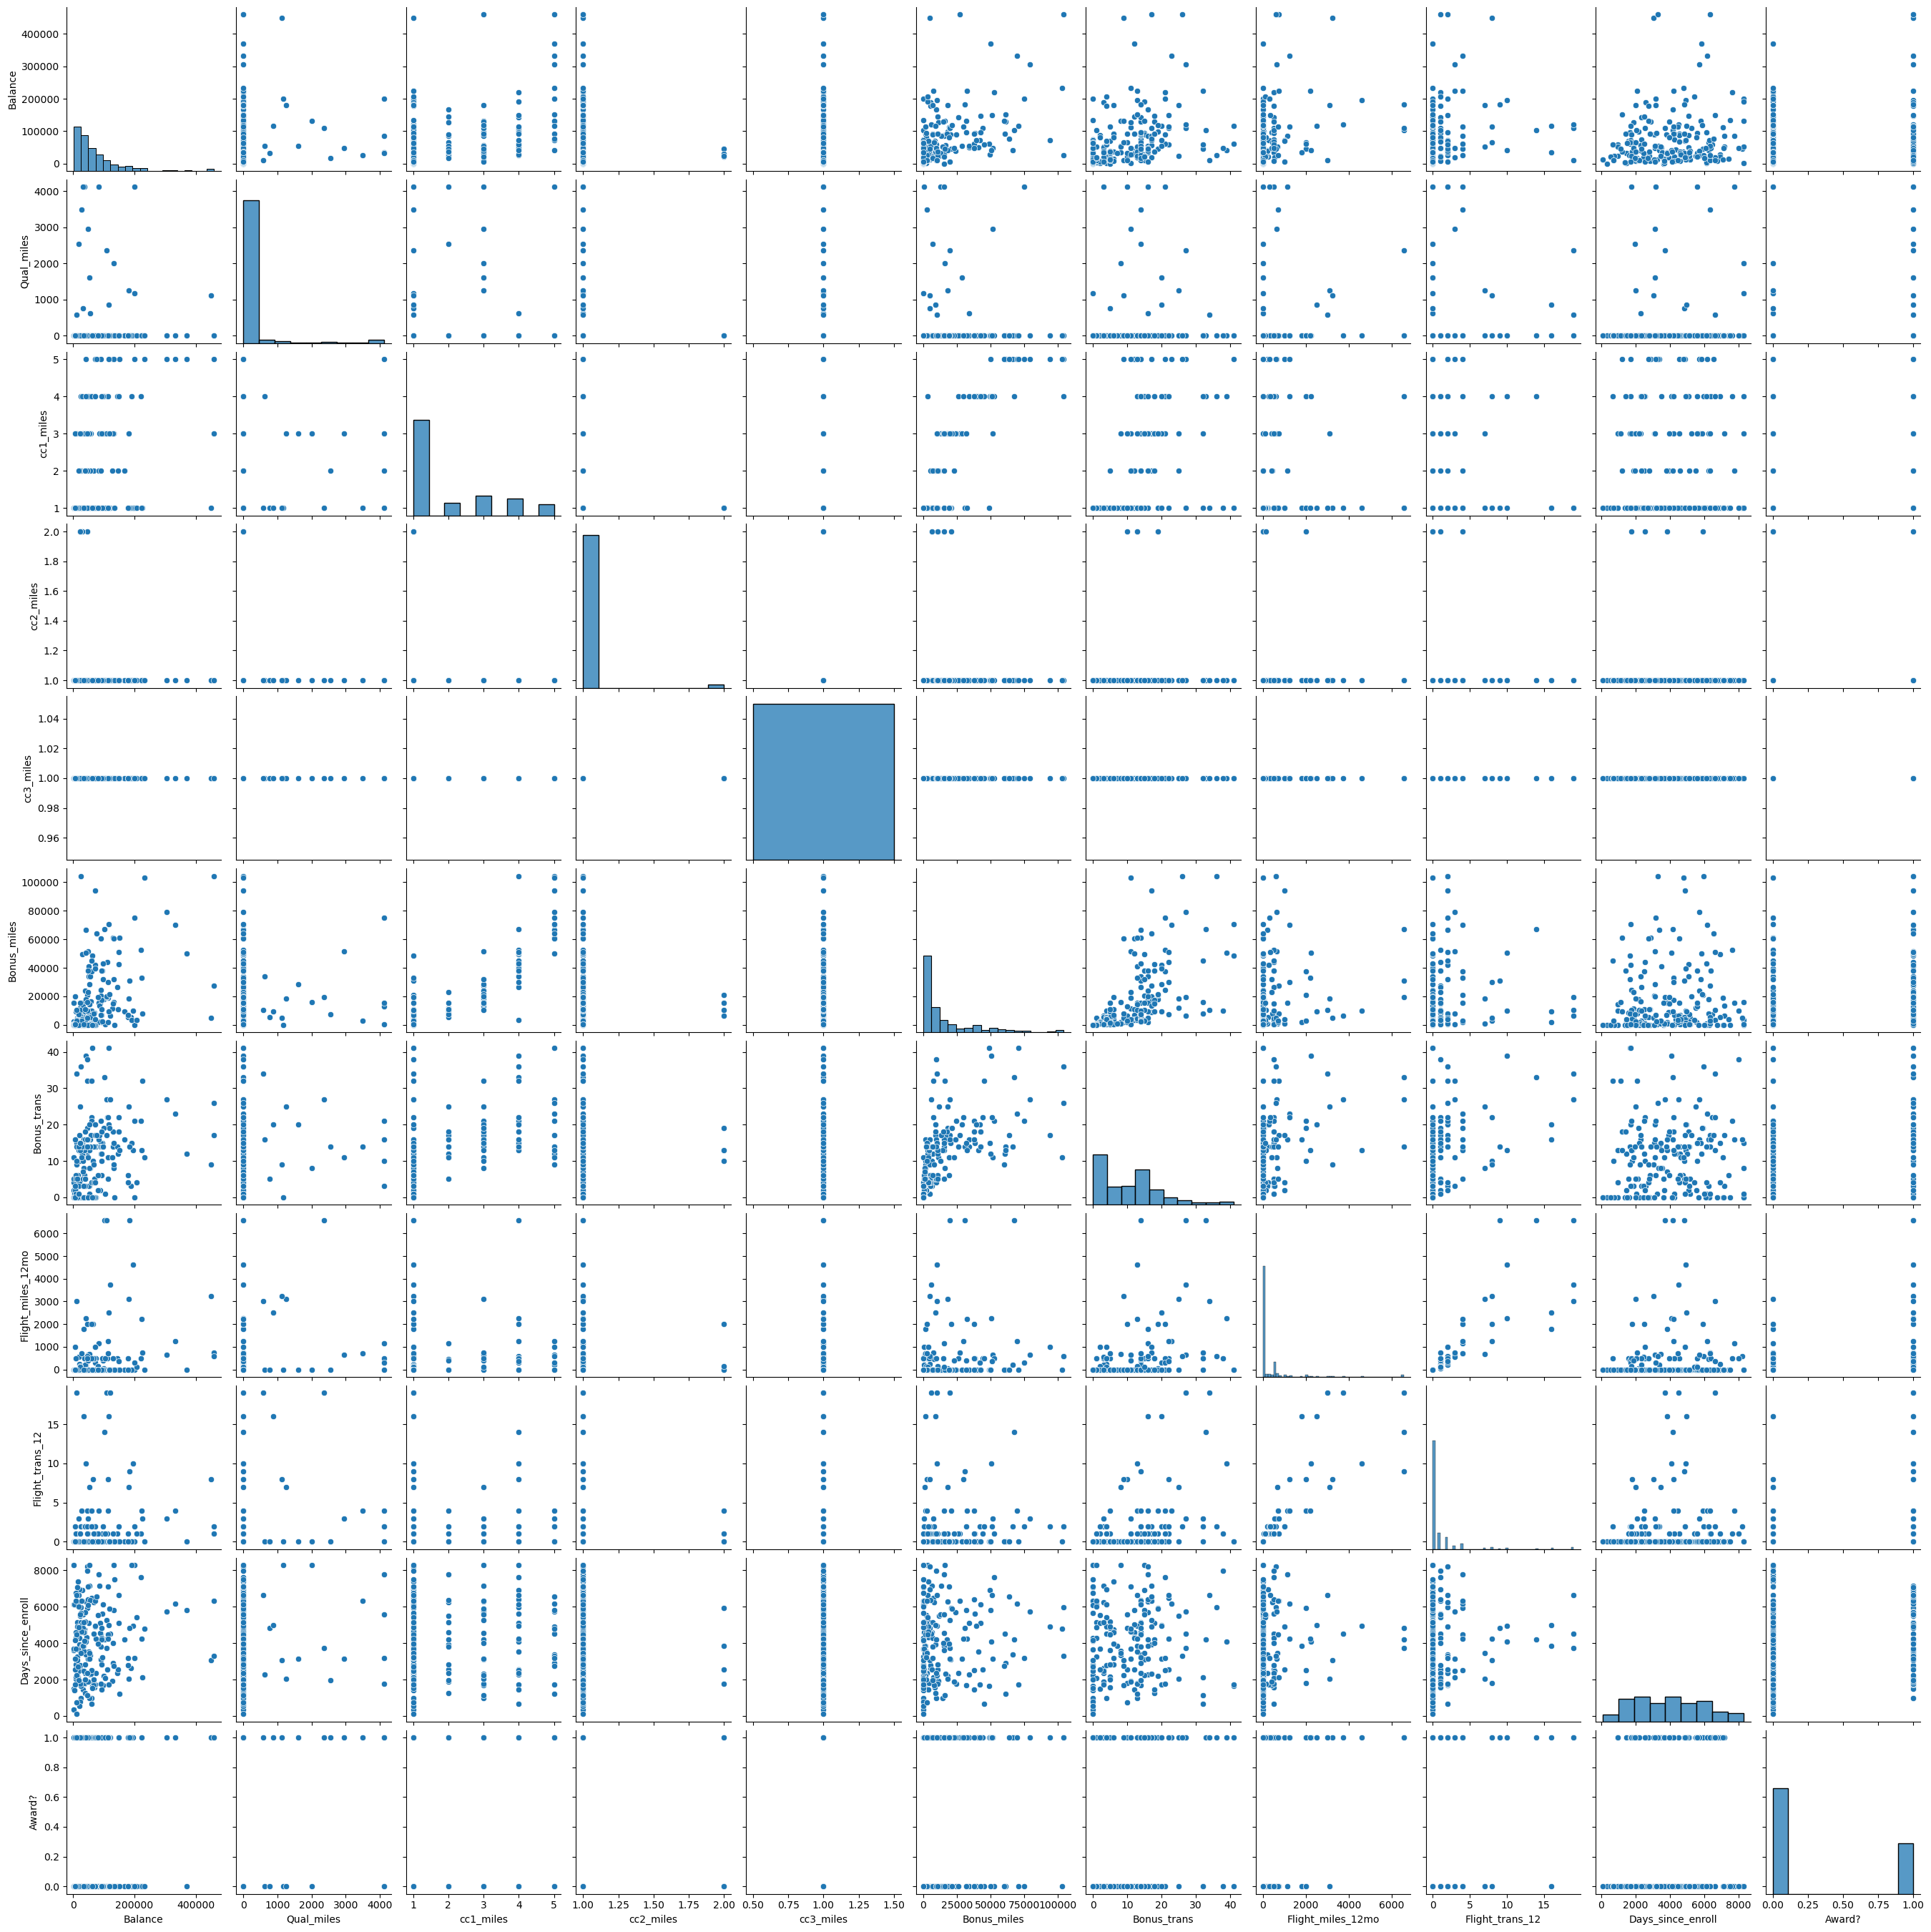

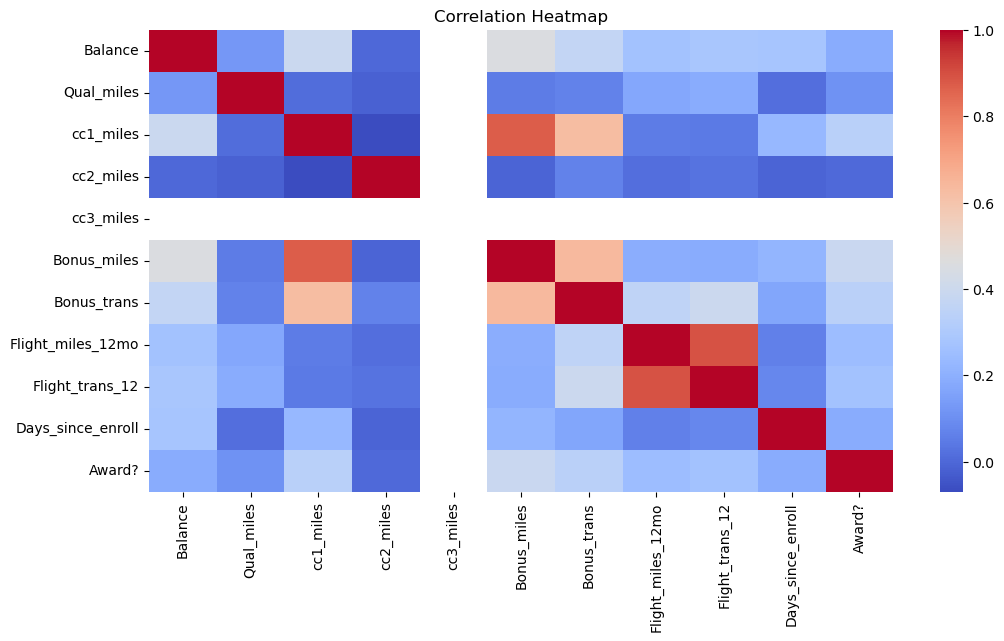

In [5]:
# 3. Exploratory Data Analysis (EDA)

sns.pairplot(df.sample(200))  # sample for visualization
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

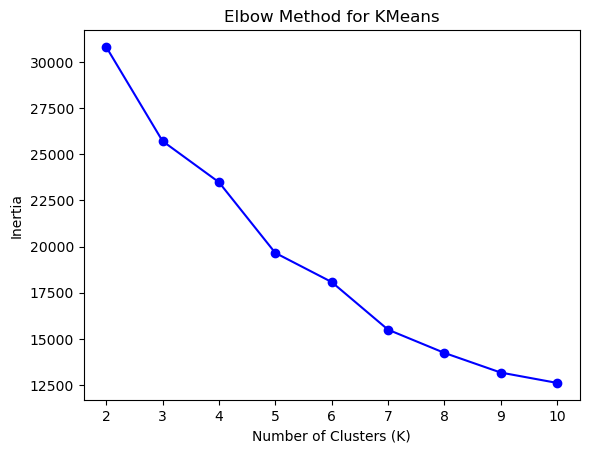

Silhouette Score (KMeans): 0.27433487202998147


In [6]:
# 4. K-Means Clustering

inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

# Choose k=5 (example, based on elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(scaled_df)

sil_kmeans = silhouette_score(scaled_df, labels_kmeans)
print("Silhouette Score (KMeans):", sil_kmeans)

df['KMeans_Cluster'] = labels_kmeans

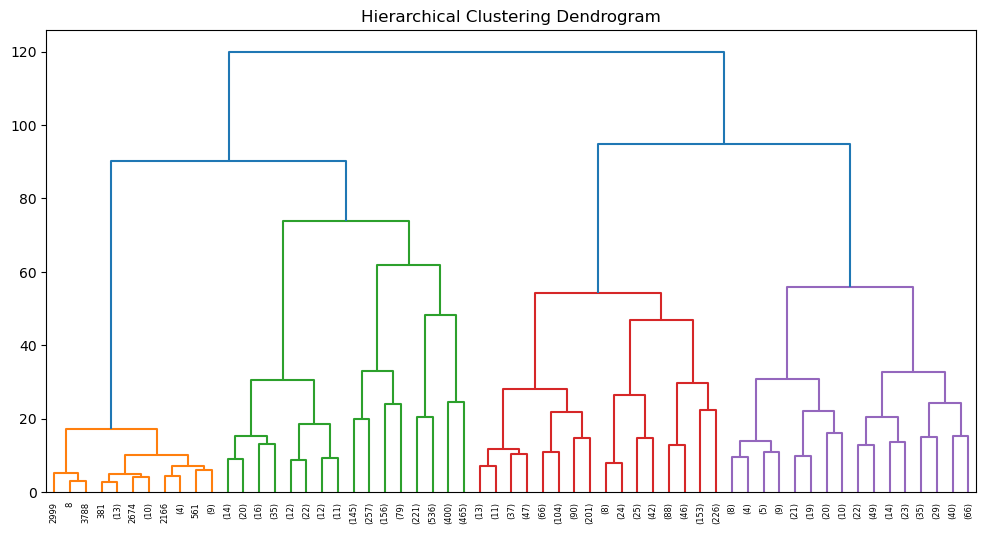

In [7]:
# 5. Hierarchical Clustering

plt.figure(figsize=(12,6))
Z = linkage(scaled_df, method='ward')
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
labels_hc = hc.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = labels_hc

In [8]:
# 6. DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)  # try different eps values
labels_db = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = labels_db

# Filter noise (-1)
if len(set(labels_db)) > 1:
    sil_db = silhouette_score(scaled_df, labels_db)
    print("Silhouette Score (DBSCAN):", sil_db)
else:
    print("DBSCAN assigned all points as noise, try tuning eps/min_samples.")


Silhouette Score (DBSCAN): 0.23438631718979955


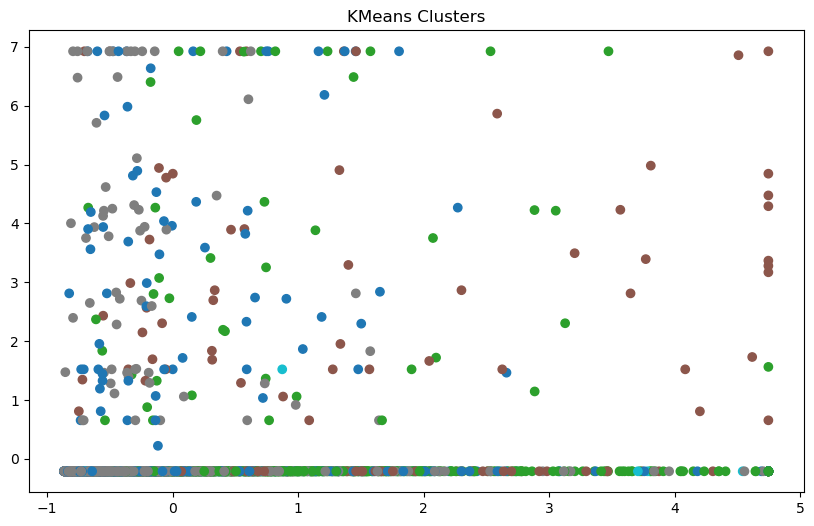

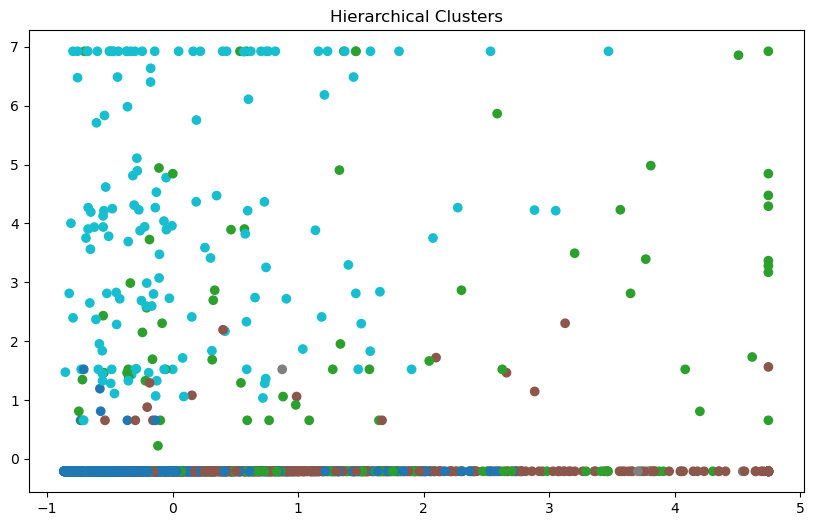

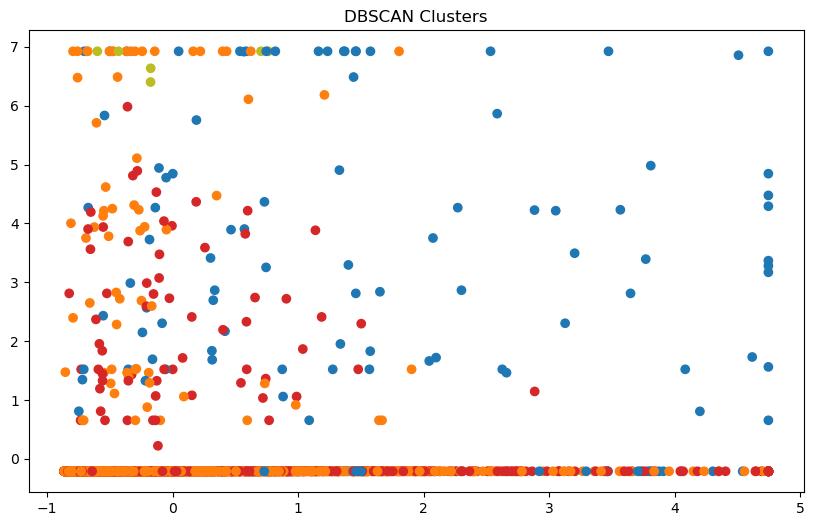

In [9]:
# 7. Visualization of Clusters

plt.figure(figsize=(10,6))
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=labels_kmeans, cmap='tab10')
plt.title("KMeans Clusters")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=labels_hc, cmap='tab10')
plt.title("Hierarchical Clusters")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(scaled_df[:,0], scaled_df[:,1], c=labels_db, cmap='tab10')
plt.title("DBSCAN Clusters")
plt.show()


In [10]:
# 8. Cluster Analysis & Insights

print("Cluster means (KMeans):")
print(df.groupby('KMeans_Cluster').mean())

print("Cluster sizes (KMeans):")
print(df['KMeans_Cluster'].value_counts())

# Save clustered dataset
df.to_csv("Clustered_EastWestAirlines.csv", index=False)

Cluster means (KMeans):
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0                55901.849784  184.014104   1.716645        1.0        1.0   
1               129710.356004  103.652455   4.102679        1.0        1.0   
2               150252.622202  524.747248   2.201835        1.0        1.0   
3                42721.941119   64.212847   1.304136        1.0        1.0   
4                68876.581395   23.255814   1.139535        2.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               10551.860229    10.280864         300.607370         0.963151   
1               46717.571696    19.431384         311.364955         0.926339   
2               29589.631009    24.132477        4079.956881        12.123853   
3                4728.77

Key Findings

* The dataset was cleaned, outliers capped, and features scaled.
* K-Means (best method) formed about 4 clear customer groups like frequent flyers, moderate travelers, and occasional travelers.
* Hierarchical Clustering showed a similar grouping structure.
* DBSCAN helped find outliers but was sensitive to parameter settings.
* Overall, K-Means gave the most useful and balanced clusters for customer segmentation.